In [1]:
!pip install Kaggle

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/82.1 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/82.1 kB ? eta -:--:--
     ---------------------------- --------- 61.4/82.1 kB 656.4 kB/s eta 0:00:01
     -------------------------------------- 82.1/82.1 kB 764.4 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for Kaggle: filename=kaggle-1.6.14-py3-none-any.whl size=105134 sha256=132ea5d51c37a46c8f9c68667ef79557e24313d3dfdc4234df057115aea9b76f
  Stored in directory: c:\users\to learn\appdata\local\pip\cache\wheels\ec\d9\04\93be57edf3835182a8e76d8ff87f7e77a0113f473ba3721ee0
Successfully built Kaggle


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
!pip install opendatasets

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for opendatasets from https://files.pythonhosted.org/packages/00/e7/12300c2f886b846375c78a4f32c0ae1cd20bdcf305b5ac45b8d7eceda3ec/opendatasets-0.1.22-py3-none-any.whl.metadata


In [3]:
import opendatasets as od
import pandas
od.download(
    "https://www.kaggle.com/datasets/prakharrastogi534/bean-leaf-dataset/data",force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:  adithir09
Your Kaggle Key: ········
Dataset URL: https://www.kaggle.com/datasets/prakharrastogi534/bean-leaf-dataset


100%|███████████████████████████████████████████████████████████████████████████████| 172M/172M [00:13<00:00, 13.3MB/s]


In [4]:
# necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [8]:
import cv2
import random as rn
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from numpy.random import seed

In [9]:
import math
import skimage.io
import skimage.transform
import skimage.filters
import keras
from skimage import data, exposure, img_as_float

In [13]:
EPOCHS = 25
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((128, 128))
image_size = 0
directory_root = r"C:\Users\To Learn\Desktop\Exp2\bean-leaf-dataset\train"


In [14]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [15]:
image_list, label_list = [], []
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
    for directory in root_dir :
        # remove .DS_Store from list
        if directory == ".DS_Store" :
            root_dir.remove(directory)

    for plant_folder in root_dir :
        plant_disease_folder_list = listdir(f"{directory_root}/{plant_folder}")


        for plant_disease_folder in plant_disease_folder_list:
            print(f"[INFO] Processing {plant_disease_folder} ...")

            plant_disease_image_list = listdir(f"{directory_root}/{plant_folder}/{plant_disease_folder}/")
            print(plant_disease_folder)
            i=len(plant_disease_image_list)
            print (i)
            for image in plant_disease_image_list[:10000]:
                image_directory = f"{directory_root}/{plant_folder}/{plant_disease_folder}/{image}"
                if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                    image_list.append(convert_image_to_array(image_directory))
                    label_list.append(plant_disease_folder)
                elif image_directory.endswith(".png") == True or image_directory.endswith(".PNG") == True:
                    image_list.append(convert_image_to_array(image_directory))
                    label_list.append(plant_disease_folder)
              
    print("[INFO] Image loading completed")
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
[INFO] Processing angular_leaf_spot ...
angular_leaf_spot
345
[INFO] Processing bean_rust ...
bean_rust
348
[INFO] Processing healthy ...
healthy
342
[INFO] Image loading completed


In [16]:
image_size = len(image_list)
print(image_size)
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
print(image_labels)
n_classes = len(label_binarizer.classes_)
np_image_list = np.array(image_list, dtype=np.float32) / 225.0
print("[INFO] Spliting data to train, test")
X_train, X_test, y_train, y_test = train_test_split(np_image_list, image_labels,
                                                    test_size=0.2, random_state = 42,shuffle=True)

print(image_labels)

1034
[[1 0 0]
 [1 0 0]
 [1 0 0]
 ...
 [0 0 1]
 [0 0 1]
 [0 0 1]]
[INFO] Spliting data to train, test
[[1 0 0]
 [1 0 0]
 [1 0 0]
 ...
 [0 0 1]
 [0 0 1]
 [0 0 1]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


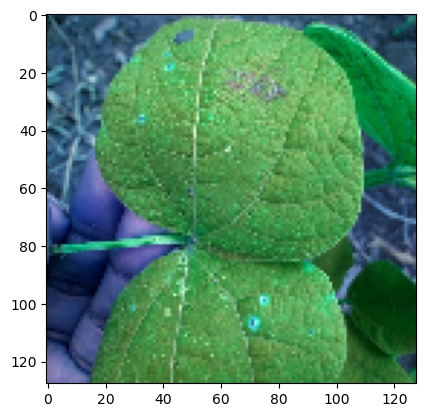

In [17]:
plt.imshow(X_train[1])

In [18]:
# shape of data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((827, 128, 128, 3), (207, 128, 128, 3), (827, 3), (207, 3))

In [19]:
# data type of dataset
X_train.dtype, X_test.dtype, y_train.dtype, y_test.dtype

(dtype('float32'), dtype('float32'), dtype('int32'), dtype('int32'))

In [20]:
# building sequential model

model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(128,128,3)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax')
])

In [21]:
# summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 49152)             0         
                                                                 
 dense (Dense)               (None, 128)               6291584   
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 256)               33024     
                                                                 
 dense_4 (Dense)             (None, 3)                 771       
                                                                 
Total params: 6358403 (24.26 MB)
Trainable params: 63584

In [22]:
# compiling model

model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

In [23]:
# fitting model

model_history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 50)

Epoch 1/50


26/26 [==============================] - 3s 84ms/step - loss: 2.6900 - accuracy: 0.3676 - val_loss: 1.3031 - val_accuracy: 0.3671
Epoch 2/50
26/26 [==============================] - 2s 77ms/step - loss: 1.3419 - accuracy: 0.4401 - val_loss: 0.9778 - val_accuracy: 0.5121
Epoch 3/50
26/26 [==============================] - 2s 77ms/step - loss: 1.0520 - accuracy: 0.5042 - val_loss: 0.9806 - val_accuracy: 0.5411
Epoch 4/50
26/26 [==============================] - 2s 75ms/step - loss: 0.9430 - accuracy: 0.5538 - val_loss: 0.8981 - val_accuracy: 0.5749
Epoch 5/50
26/26 [==============================] - 2s 75ms/step - loss: 0.8598 - accuracy: 0.5925 - val_loss: 0.9038 - val_accuracy: 0.5797
Epoch 6/50
26/26 [==============================] - 2s 75ms/step - loss: 0.7496 - accuracy: 0.6638 - val_loss: 0.8184 - val_accuracy: 0.6039
Epoch 7/50
26/26 [==============================] - 2s 76ms/step - loss: 0.7553 - accuracy: 0.6699 - val_loss: 0.7873 - val_accuracy: 0.6377
Epoch 8/50


In [31]:
# evaluating model

model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 1.2556 - accuracy: 0.6425


[1.2555925846099854, 0.6425120830535889]

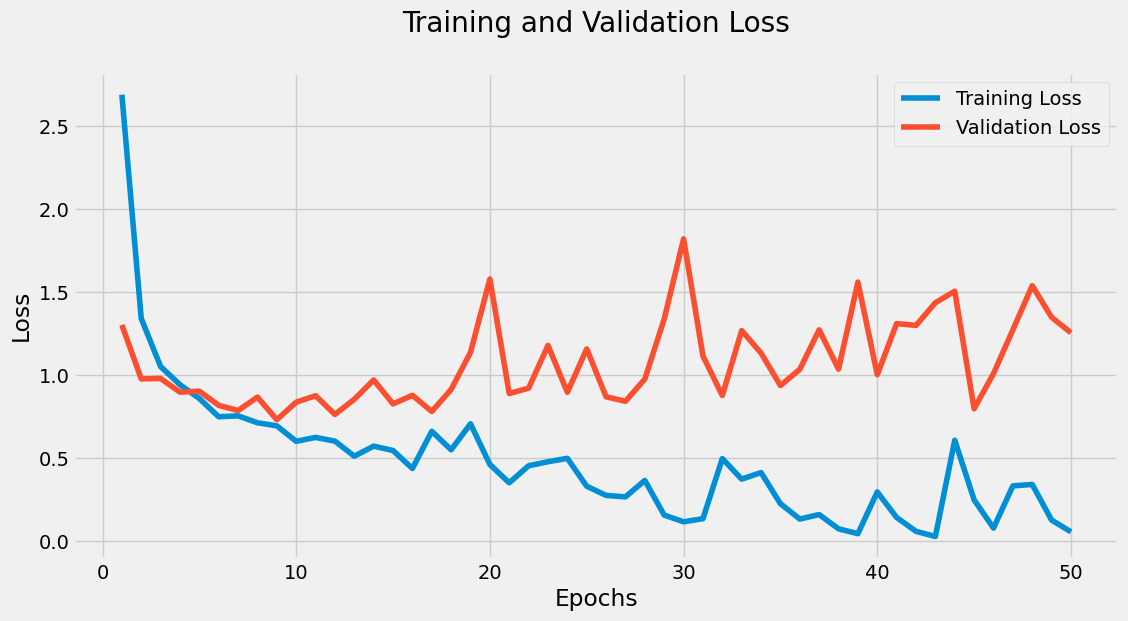

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
plt.style.use('fivethirtyeight')

train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss'] 
epochs = range(1, 51)

sns.lineplot(x=epochs, y=train_loss, label='Training Loss')
sns.lineplot(x=epochs, y=val_loss, label='Validation Loss')

plt.title('Training and Validation Loss\n')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()


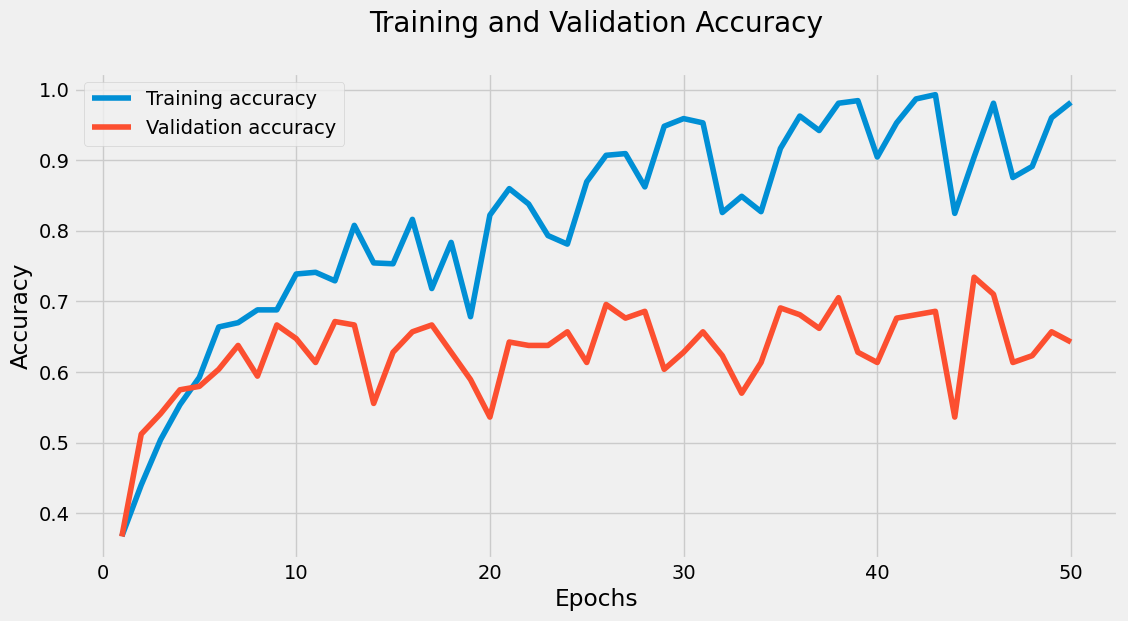

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

train_accuracy = model_history.history['accuracy']
val_accuracy = model_history.history['val_accuracy']
epochs = range(1, 51)

sns.lineplot(x=epochs, y=train_accuracy, label='Training accuracy')
sns.lineplot(x=epochs, y=val_accuracy, label='Validation accuracy')

plt.title('Training and Validation Accuracy\n')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()


In [41]:
# making predictions

y_probs = model.predict(X_test)
y_preds = y_probs.argmax(axis = 1)

y_preds[:100]

7/7 [==============================] - 0s 4ms/step


array([2, 1, 1, 0, 1, 1, 0, 2, 0, 1, 2, 2, 2, 2, 1, 0, 0, 2, 0, 2, 2, 2,
       1, 0, 1, 2, 0, 1, 0, 0, 2, 0, 0, 1, 2, 1, 1, 2, 1, 1, 2, 2, 0, 0,
       0, 2, 2, 0, 0, 2, 1, 1, 0, 2, 0, 2, 0, 2, 2, 1, 2, 2, 1, 2, 0, 1,
       0, 1, 2, 2, 1, 2, 1, 0, 2, 2, 1, 0, 2, 2, 1, 0, 0, 1, 0, 1, 2, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2], dtype=int64)

7/7 [==============================] - 0s 4ms/step


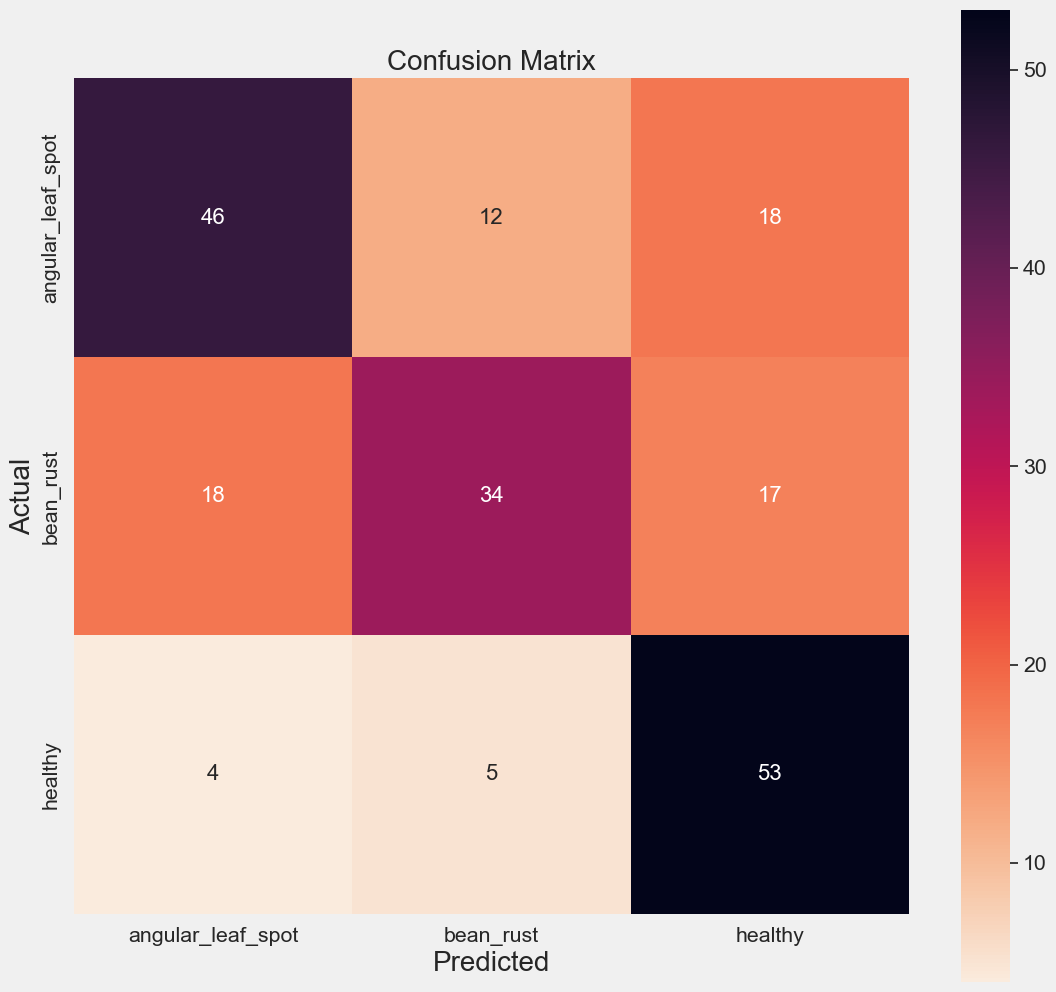

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


labels = ['angular_leaf_spot', 'bean_rust', 'healthy']

Ypred = model.predict(X_test)
Ypred = np.argmax(Ypred, axis=1)
Ytrue = np.argmax(y_test, axis=1)

cm = confusion_matrix(Ytrue, Ypred)

plt.figure(figsize=(12, 12))
sns.set(font_scale=1.4)
ax = sns.heatmap(cm, annot=True, fmt='d', cmap="rocket_r", annot_kws={'size': 16},
                 square=True, xticklabels=labels, yticklabels=labels)

ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)
ax.set_title('Confusion Matrix', fontsize=20)
plt.show()


In [45]:
from sklearn.metrics import confusion_matrix, classification_report


# Example classification report
print('Classification Report:')
print(classification_report(Ytrue, Ypred))

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.61      0.64        76
           1       0.67      0.49      0.57        69
           2       0.60      0.85      0.71        62

    accuracy                           0.64       207
   macro avg       0.65      0.65      0.64       207
weighted avg       0.65      0.64      0.64       207



In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(Ytrue, Ypred)
precision = precision_score(Ytrue, Ypred, average='macro') 
recall = recall_score(Ytrue, Ypred, average='macro')
f1 = f1_score(Ytrue, Ypred, average='macro') 

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 0.6425
Precision: 0.6485
Recall: 0.6510
F1 Score: 0.6374
